In [2]:
import numpy as np
import matplotlib.pyplot as plt

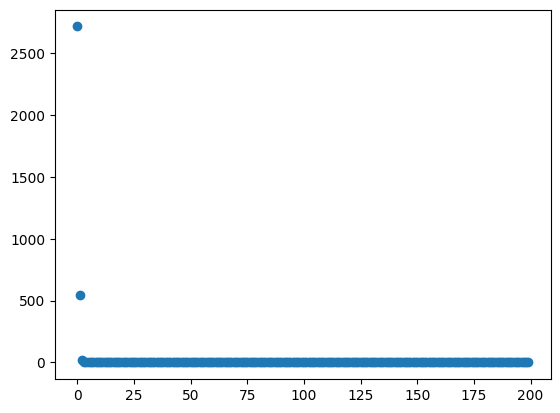

[2.71708148e+03 5.48562009e+02 1.80196134e+01 5.81903374e-01]
(array([0, 1, 2, 3], dtype=int64),)


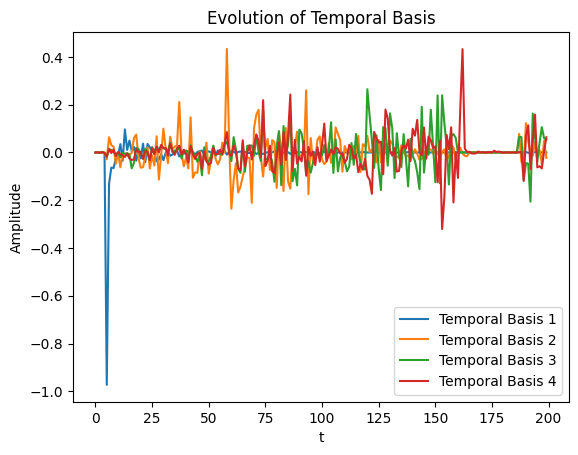

In [31]:
x = np.linspace(0,2,200)
y = np.linspace(0,1,200)
t = np.arange(0, 200,1)
A = 0.25
eps = 0.1
w = (2*np.pi)/10

def a(t, w, eps):
    return eps*np.sin(w*t)
def b(t, w, eps):
    return 1 - 2*eps*np.sin(w*t)
def f(x,a,b):
    return a*x**2 + b*x
def psi(y, f, A):
    return A*np.sin(np.pi*f)*np.sin(np.pi*y)

D = np.zeros((80000, 200))
u = []
v = []

for i in range(200):
    u = -np.gradient(psi(y, f(x, a(t[i], w, eps), b(t[i], w, eps)), A), y)
    v = np.gradient(psi(y, f(x, a(t[i], w, eps), b(t[i], w, eps)), A), x)
    U, V = np.meshgrid(u,v)
    D[:, i] = np.concatenate([U.flatten(), V.flatten()]) 

A, S, B = np.linalg.svd(D, full_matrices=False)

plt.scatter(np.arange(len(S)), S)
plt.show()
dominant_indices = np.where(S > 0.5)
dominant_singular_values = S[dominant_indices]
print(dominant_singular_values)
print(dominant_indices)
# considering 4 dominant basis
dominant_temporal_basis = A[:4, :].T
for i in range(4):
    plt.plot(t, dominant_temporal_basis[:, i], label=f'Temporal Basis {i + 1}')

plt.title('Evolution of Temporal Basis')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.show()